In [1]:
import torch
import PIL
import torchvision
import matplotlib.pyplot as plt 
import numpy as np
import torchvision.transforms as T
from tqdm import tqdm_notebook
# from tqdm.notebook import tqdm_notebook

import cv2
# import imgproc

from torch import nn

import os 

# local files
import sys
sys.path.insert(0, '../')
import pyClient
import utils
import model
from model import Transition
import training
import imgproc

import pandas as pd
from torch import optim

import csv

In [3]:
train_specs = pd.read_csv("../Experiments/Out/Exp1_Aug_11/_specs.csv").set_index('model_name')

for i, cfg in train_specs.iterrows():
    print(cfg.name)

exp1-aug-11_comp_complex-seed_0-mode_edge-detection-phos_5
exp1-aug-11_comp_complex-seed_0-mode_edge-detection-phos_10
exp1-aug-11_comp_complex-seed_0-mode_edge-detection-phos_18
exp1-aug-11_comp_complex-seed_0-mode_edge-detection-phos_26
exp1-aug-11_comp_complex-seed_0-mode_edge-detection-phos_34
exp1-aug-11_comp_complex-seed_0-mode_edge-detection-phos_42
exp1-aug-11_comp_complex-seed_0-mode_edge-detection-phos_50
exp1-aug-11_comp_complex-seed_1-mode_edge-detection-phos_5
exp1-aug-11_comp_complex-seed_1-mode_edge-detection-phos_10
exp1-aug-11_comp_complex-seed_1-mode_edge-detection-phos_18
exp1-aug-11_comp_complex-seed_1-mode_edge-detection-phos_26
exp1-aug-11_comp_complex-seed_1-mode_edge-detection-phos_34
exp1-aug-11_comp_complex-seed_1-mode_edge-detection-phos_42
exp1-aug-11_comp_complex-seed_1-mode_edge-detection-phos_50
exp1-aug-11_comp_complex-seed_2-mode_edge-detection-phos_5
exp1-aug-11_comp_complex-seed_2-mode_edge-detection-phos_10
exp1-aug-11_comp_complex-seed_2-mode_edge-d

<AxesSubplot:xlabel='phosphene_resolution', ylabel='cumulative_reward'>

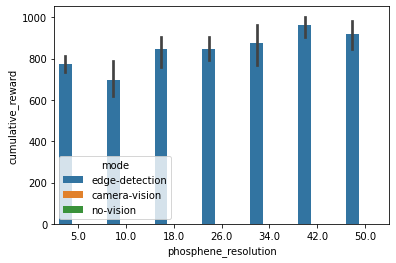

In [8]:
import seaborn as sns
sns.barplot(data=train_specs, x='phosphene_resolution', y='cumulative_reward', hue='mode')

In [11]:
train_specs['mode']=='camera-vision'

model_name
exp1-aug-11_comp_complex-seed_0-mode_edge-detection-phos_5     False
exp1-aug-11_comp_complex-seed_0-mode_edge-detection-phos_10    False
exp1-aug-11_comp_complex-seed_0-mode_edge-detection-phos_18    False
exp1-aug-11_comp_complex-seed_0-mode_edge-detection-phos_26    False
exp1-aug-11_comp_complex-seed_0-mode_edge-detection-phos_34    False
exp1-aug-11_comp_complex-seed_0-mode_edge-detection-phos_42    False
exp1-aug-11_comp_complex-seed_0-mode_edge-detection-phos_50    False
exp1-aug-11_comp_complex-seed_1-mode_edge-detection-phos_5     False
exp1-aug-11_comp_complex-seed_1-mode_edge-detection-phos_10    False
exp1-aug-11_comp_complex-seed_1-mode_edge-detection-phos_18    False
exp1-aug-11_comp_complex-seed_1-mode_edge-detection-phos_26    False
exp1-aug-11_comp_complex-seed_1-mode_edge-detection-phos_34    False
exp1-aug-11_comp_complex-seed_1-mode_edge-detection-phos_42    False
exp1-aug-11_comp_complex-seed_1-mode_edge-detection-phos_50    False
exp1-aug-11_comp_comple

In [12]:
train_specs.loc[train_specs['mode']=='camera-vision']

,status,complexity,seed,mode,phosphene_resolution,name,descr,fwd_reward,side_reward,box_reward,...,replay_start_size,target_update,memory_capacity,dist_feedback,edge_threshold,wall_collisions,box_collisions,endless_loops,step_count,cumulative_reward
model_name,,,,,,,,,,,,,,,,,,,,,
exp1-aug-11_comp_complex-seed_0-mode_camera-vision,finished,complex,0,camera-vision,NaN,Exp1-Aug-11,Different phosphene resolutions,10,-1,-20,...,1500,50000,36000,False,120,NaN,NaN,NaN,NaN,NaN
exp1-aug-11_comp_complex-seed_1-mode_camera-vision,finished,complex,1,camera-vision,NaN,Exp1-Aug-11,Different phosphene resolutions,10,-1,-20,...,1500,50000,36000,False,120,NaN,NaN,NaN,NaN,NaN
exp1-aug-11_comp_complex-seed_2-mode_camera-vision,finished,complex,2,camera-vision,NaN,Exp1-Aug-11,Different phosphene resolutions,10,-1,-20,...,1500,50000,36000,False,120,NaN,NaN,NaN,NaN,NaN
exp1-aug-11_comp_plain-seed_0-mode_camera-vision,finished,plain,0,camera-vision,NaN,Exp1-Aug-11,Different phosphene resolutions,10,-1,-20,...,1500,50000,36000,False,120,NaN,NaN,NaN,NaN,NaN
exp1-aug-11_comp_plain-seed_1-mode_camera-vision,finished,plain,1,camera-vision,NaN,Exp1-Aug-11,Different phosphene resolutions,10,-1,-20,...,1500,50000,36000,False,120,NaN,NaN,NaN,NaN,NaN
exp1-aug-11_comp_plain-seed_2-mode_camera-vision,finished,plain,2,camera-vision,NaN,Exp1-Aug-11,Different phosphene resolutions,10,-1,-20,...,1500,50000,36000,False,120,NaN,NaN,NaN,NaN,NaN


In [3]:
import math
import datetime
import os, sys
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from IPython.display import Audio
import csv

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
from torchsummary import summary
import argparse

import cv2


import itertools
import re
import pandas as pd
import numpy as np


# local files
sys.path.insert(0, '../')
import pyClient
import utils
import model
import imgproc
from model import Transition
import testing

In [4]:
class DummyEnvironment:
    def __init__(self, ip = "127.0.0.1", port = 13000, size = 128, channels=16, *args,**kwargs):
        self.ip         = ip
        self.port       = port
        self.size       = size
        self.channels   = channels

    def reset(self, kind=0):
         # 0: plain 1: complex 2: plain_test 3: complex_test
        self._send(1, kind)
        return self._receive()

    def step(self, action):
        self._send(2, action)
        return self._receive()

    def setRandomSeed(self, action):
        self._send(3, action)
        return self._receive()

    def _receive(self):
        end    = np.random.choice([0,1,2,3], p=[0.7,0.1,0.1,0.1])
        reward = 99 #int(255*np.random.rand())
        state  = {'colors': (np.random.rand(self.size,self.size,3)*255).astype('uint8')}
        return end, reward, state

    def _send(self, action, command):
        return

In [5]:
savedir = "../Experiments/Out/Exp3_Aug_11/"
current_model = cfg.name
cfg['device'] = 'cpu'
cfg['stack_size'] = 1
cfg['in_channels'] = cfg['stack_size']
cfg['batch_size'] = 3
cfg['optimizations_per_step'] = 1
# cfg['lr_dqn'] = 0.9
cfg['edge_threshold'] = 120

# Additional training settings (inferred from specified settings)
cfg['training_condition'] = {'plain': 0, 'complex': 1}[cfg['complexity']]
cfg['model_path']         = os.path.join(savedir,'{}.pth'.format(current_model)) # Save path for model
cfg['logfile']            = os.path.join(savedir,'{}_train_stats.csv'.format(current_model)) # To save the training stats

#         # Write train_specs to csvfile
#         if train_specs.loc[current_model, 'status'] == 'finished':
#             print('skipping.. already finished in previous training: {}'.format(current_model))
#             continue
#         train_specs.loc[current_model, 'status'] = 'training'
#         train_specs.to_csv(specs_file)
#         print(train_specs)

# Initialize model components
torch.manual_seed(cfg['seed'])
# agent = model.DoubleDQNAgent(**cfg)
agent = model.AdaptiveAgent(**cfg)
# img_processing = imgproc.ImageProcessor(**cfg)
if cfg['adaptive_threshold']:
    print("Using adaptive edge threshold") # TODO: this print statement can be removed
    optimizer = optim.Adam([*agent.canny_layer.parameters(), *agent.policy_net.parameters()], lr = cfg['lr_dqn'])
else:
    optimizer = optim.Adam(agent.policy_net.parameters(), lr = cfg['lr_dqn'])

environment = DummyEnvironment(**cfg)
    
# environment =  pyClient.Environment(**cfg) #if not environment_connected else environment # Only initialized on first run

#         # # Training
#         assert environment.client is not None, "Error: could not connect to env. Make sure to start Unity server first!"
#         environment_connected = True
#         train(agent, environment, img_processing, optimizer, cfg)

#         # Write specs to training file
#         train_specs.loc[current_model, 'status'] = 'finished'
#         train_specs.to_csv(specs_file)
#         print('finished training')

Using adaptive edge threshold


In [7]:
from training_adaptive_threshold import train, validation_loop

train(agent, environment, None, optimizer, cfg)

episode 0, step count: 40 wall_collisions: 4, box_collisions: 8, endless_loops: 7, total_reward: 2574.0, threshold: 0.4706
model improved! Saving to ../Experiments/Out/Exp3_Aug_11/exp3-aug11_comp_plain-seed_2-mode_edge-detection-phos_34-edge_1000.pth
Target net updated!
episode 1, step count: 46 wall_collisions: 2, box_collisions: 3, endless_loops: 9, total_reward: 4158.0, threshold: 0.4706
model improved! Saving to ../Experiments/Out/Exp3_Aug_11/exp3-aug11_comp_plain-seed_2-mode_edge-detection-phos_34-edge_1000.pth
episode 3, step count: 104 wall_collisions: 11, box_collisions: 5, endless_loops: 0, total_reward: 7029.0, threshold: 0.4601
model improved! Saving to ../Experiments/Out/Exp3_Aug_11/exp3-aug11_comp_plain-seed_2-mode_edge-detection-phos_34-edge_1000.pth
episode 13, step count: 151 wall_collisions: 12, box_collisions: 19, endless_loops: 0, total_reward: 2574.0, threshold: 0.4012
episode 25, step count: 38 wall_collisions: 3, box_collisions: 1, endless_loops: 6, total_reward: 

KeyboardInterrupt: 

In [ ]:
self.policy_net(state_batch).gather(1, action_batch).squeeze()

In [29]:
agent.canny_layer.threshold

Parameter containing:
tensor(12.3969, requires_grad=True)

In [26]:
transitions = agent.memory.sample(agent.batch_size)
batch = Transition(*zip(*transitions))

# Concatenate (next) states into batch and process with canny and simulator
if type(batch.state[0]) == np.ndarray:
    state_batch = np.concatenate(batch.state)
elif type(batch.state[0]) == torch.Tensor:
    state_batch = torch.cat(batch.state) 



In [40]:
y = agent.process_observation(state_batch)
pred = agent.policy_net(y)
loss = pred.mean()

# state_action_values, expected_state_action_values = agent.forward()
# loss = 1e100 * state_action_values.mean()

grad = agent.canny_layer.threshold.grad
agent.canny_layer.zero_grad()
print(f"grad before: {grad}")
loss.backward()
grad = agent.canny_layer.threshold.grad
print(f"grad after: {grad}")


optimizer.step()

grad before: 0.0
grad after: 0.0008726119995117188


In [17]:
scheduler = torch.optim.lr_scheduler.LinearLR(optimizer,1,.01, 1000)

In [27]:
for _ in range(5):
    optimiz
    scheduler.step()

C:\Users\Jaap\Anaconda3\envs\py36\lib\site-packages\torch\optim\lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


In [10]:
help(torch.optim.lr_scheduler.LinearLR)

Help on class LinearLR in module torch.optim.lr_scheduler:

class LinearLR(_LRScheduler)
 |  Decays the learning rate of each parameter group by linearly changing small
 |  multiplicative factor until the number of epoch reaches a pre-defined milestone: total_iters.
 |  Notice that such decay can happen simultaneously with other changes to the learning rate
 |  from outside this scheduler. When last_epoch=-1, sets initial lr as lr.
 |  
 |  Args:
 |      optimizer (Optimizer): Wrapped optimizer.
 |      start_factor (float): The number we multiply learning rate in the first epoch.
 |          The multiplication factor changes towards end_factor in the following epochs.
 |          Default: 1./3.
 |      end_factor (float): The number we multiply learning rate at the end of linear changing
 |          process. Default: 1.0.
 |      total_iters (int): The number of iterations that multiplicative factor reaches to 1.
 |          Default: 5.
 |      last_epoch (int): The index of the last 

In [8]:
dir(torch.optim.lr_scheduler)


['ChainedScheduler',
 'ConstantLR',
 'CosineAnnealingLR',
 'CosineAnnealingWarmRestarts',
 'Counter',
 'CyclicLR',
 'EPOCH_DEPRECATION_WARNING',
 'ExponentialLR',
 'LambdaLR',
 'LinearLR',
 'MultiStepLR',
 'MultiplicativeLR',
 'OneCycleLR',
 'Optimizer',
 'ReduceLROnPlateau',
 'SequentialLR',
 'StepLR',
 '_LRScheduler',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'bisect_right',
 'inf',
 'math',
 'types',
 'warnings',
 'weakref',
 'wraps']

(array([4.7456e+04, 9.0400e+02, 4.4100e+02, 1.1000e+01, 5.9000e+01,
        5.3000e+01, 7.2000e+01, 4.5000e+01, 5.7000e+01, 5.4000e+01]),
 array([0.        , 0.06367389, 0.12734778, 0.19102167, 0.25469556,
        0.31836945, 0.38204333, 0.44571722, 0.5093911 , 0.573065  ,
        0.6367389 ], dtype=float32),
 <BarContainer object of 10 artists>)

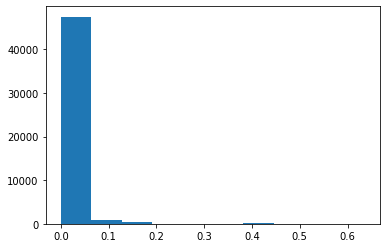

In [38]:
plt.hist(y.flatten().detach().numpy())

In [16]:
state_action_values, expected_state_action_values = agent.forward()

In [24]:
state_action_values

tensor([118.7073, 118.4582, 121.0643], grad_fn=<SqueezeBackward0>)

In [ ]:
agent.forward

In [ ]:
from training_adaptive_threshold import validation_loop

# For reproducability, reset the RNG seed
torch.manual_seed(cfg['seed'])

# Write header to logfile
with open(cfg['logfile'], 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['episode','step_count',
                     'wall_collisions', 'box_collisions',
                     'endless_loops','reward', 'epsilon', 'train_loss', 'edge_threshold', 'validation'])

# Counters
wall_collisions = 0
box_collisions = 0
episode_reward = 0
endless_loops = 0
total_loss = 0
step_count = 0
best_reward = np.NINF
best_tr_reward = np.NINF
optimizer.optimization_count = 0
target_net_update_count = 0

for episode in range(cfg['max_episodes']):

    if cfg['adaptive_threshold']:
        edge_threshold = img_processing.canny.threshold.item()
    else:
        edge_threshold = cfg['edge_threshold']

    # Valdation loop
    if episode_reward > best_tr_reward:
        best_tr_reward = episode_reward
        best_episode_so_far = True

    if (episode % cfg['validate_every'] == 0) or best_episode_so_far:
        best_episode_so_far = False
        val_performance = validation_loop(agent,environment,img_processing,cfg)
        val_reward = val_performance[-1]
        print('episode {}, step count: {} wall_collisions: {}, box_collisions: {}, endless_loops: {}, total_reward: {}, threshold: {:0.4f}'.format(episode,*val_performance, edge_threshold))

        # Save best model
        if val_reward > best_reward:
            print("model improved! Saving to {}".format(cfg['model_path']))
            best_reward = val_reward
            torch.save(agent.policy_net.state_dict(), cfg['model_path'])

        # Write validation performance to log file
        with open(cfg['logfile'], 'a') as csvfile:
            writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            writer.writerow([episode, *val_performance,0, 0, edge_threshold, 1])

    # Write training performance to log file
    with open(cfg['logfile'], 'a') as csvfile:
        writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        writer.writerow([episode,step_count,
                         wall_collisions, box_collisions,
                         endless_loops, episode_reward,agent.eps_threshold,total_loss, edge_threshold, 0])

    # Reset counters
    total_loss = 0 # COMMENT OUT TO REGISTER CUMULATIVE LOSS
    wall_collisions = 0
    box_collisions = 0
    episode_reward = 0
    endless_loops = 0
    step_count = 0
    side_steps = 0 # Side-step counter (to prevent endless loops)
    fwd_steps = 0 # Total forward step counter (for dist from start feedback)

    # Stop training after (either maximum number of steps or maximum number of episodes)
    if optimizer.optimization_count > cfg['max_optim_steps']:
        break


    # Target net is updated once in a few steps (double Q-learning)
    if optimizer.optimization_count / cfg['target_update'] >= target_net_update_count:  #steps
        print('Target net updated!')
        agent.update_target_net()
        target_net_update_count += 1


    # Reset environment at start of episode
    # seed = torch.randint(250,(1,)).item()
    # _, _, _ = environment.setRandomSeed(seed)
    _, _, _ = environment.reset(cfg['training_condition'])

    # Create an empty frame stack and fill it with frames
    frame_stack = imgproc.FrameStack(stack_size=cfg['stack_size'] )
    for _ in range(cfg['stack_size'] ):
        _, _, frame_raw = environment.step(0)
#             frame = img_processing(frame_raw).to(agent.device)
#             state = frame_stack.update_with(frame)
        frame = cv2.cvtColor(frame_raw['colors'], cv2.COLOR_BGR2GRAY)
        stack = frame_stack.update_with(frame)
        observation = np.expand_dims(np.stack(stack),0) # 1 X C X W X H  for C number of frames in stack

#         if cfg['dist_feedback']: # Additional channel encodes distance from start
#             state = torch.cat([state, torch.zeros(1,1,cfg['imsize'],cfg['imsize'],device=cfg['device'])], dim=1)

    # Episode starts here:
    for t in count():

        # 1. Agent performs a step (based on the current state) and obtains next state
        agent.policy_net.eval()
        action = agent.select_action(observation)
        side_steps = side_steps + 1  if action != 0 else 0
        end, reward, frame_raw = environment.step(action.item())
        agent_died = cfg['reset_end_is_{}'.format(end)] or side_steps > cfg['reset_after_nr_sidesteps']
#             frame = img_processing(frame_raw).to(agent.device)
#             next_state = frame_stack.update_with(frame) if not agent_died else None
        frame = cv2.cvtColor(frame_raw['colors'], cv2.COLOR_BGR2GRAY)
        stack = frame_stack.update_with(frame)
        next_observation = np.expand_dims(np.stack(stack),0) if not agent_died else None

        if action == 0:
            fwd_steps += 1

#             if cfg['dist_feedback'] and next_state is not None: # Additional channel encodes distance from start
#                 next_state = torch.cat([next_state,fwd_steps*torch.ones(1,1,cfg['imsize'],cfg['imsize'],device=cfg['device'])], dim=1)/cfg['n_target_steps']


        # 2. Interpret reward signal
        if reward > 100:
            reward = -(reward -100)
        reward *= cfg['reward_multiplier']

        if side_steps > cfg['reset_after_nr_sidesteps']:
            reward = cfg['early_stop_reward']

        # 3. Push the transition to replay memory (in the right format & shape)
        reward = torch.tensor([reward], device=agent.device,dtype=torch.float)
        action = action.unsqueeze(0)
        agent.memory.push(observation, action, next_observation, reward)


        # 4. optimize model
        agent.policy_net.train()
        if len(agent.memory) > cfg['stack_size']: # cfg['replay_start_size']:

            for _ in range(cfg['optimizations_per_step']):
                state_action_values, expected_state_action_values = agent.forward()

                # Compute Huber loss
                loss = F.smooth_l1_loss(state_action_values, expected_state_action_values)
                total_loss += loss.item()

                # Optimize the model
                optimizer.zero_grad()
                loss.backward()

                # Gradient clipping
                nn.utils.clip_grad_norm_(agent.policy_net.parameters(), 1)

                # Update the model parameters
                optimizer.step()
                optimizer.optimization_count += 1

        else:
            # Do not count steps, as optimization has not started yet (delay epsilon decay)
            agent.step_count = 0

        # 5. Store performance and training measures
        step_count += 1
        episode_reward += reward.item();
        if end == 1:
            box_collisions += 1
        if end == 2:
            wall_collisions +=1
        if side_steps > cfg['reset_after_nr_sidesteps']:
            endless_loops +=1

        # 6. the episode ends here if agent performed any 'lethal' action (specified in RESET_UPON_END_SIGNAL)
        if agent_died:
            break
        else:
            observation = next_observation

In [ ]:
agent.policy_net

In [ ]:
# For reproducability, reset the RNG seed
torch.manual_seed(cfg['seed'])

# Write header to logfile
with open(cfg['logfile'], 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['episode','step_count',
                     'wall_collisions', 'box_collisions',
                     'endless_loops','reward', 'epsilon', 'train_loss', 'edge_threshold', 'validation'])

# Counters
wall_collisions = 0
box_collisions = 0
episode_reward = 0
endless_loops = 0
total_loss = 0
step_count = 0
best_reward = np.NINF
best_tr_reward = np.NINF
optimizer.optimization_count = 0
target_net_update_count = 0

for episode in range(cfg['max_episodes']):

    if cfg['adaptive_threshold']:
        edge_threshold = img_processing.canny.threshold.item()
    else:
        edge_threshold = cfg['edge_threshold']

    # Valdation loop
    if episode_reward > best_tr_reward:
        best_tr_reward = episode_reward
        best_episode_so_far = True

    if (episode % cfg['validate_every'] == 0) or best_episode_so_far:
        best_episode_so_far = False
        val_performance = training.validation_loop(agent,environment,img_processing,cfg)
        val_reward = val_performance[-1]
        print('episode {}, step count: {} wall_collisions: {}, box_collisions: {}, endless_loops: {}, total_reward: {}, threshold: {:0.4f}'.format(episode,*val_performance, edge_threshold))

        # Save best model
        if val_reward > best_reward:
            print("model improved! Saving to {}".format(cfg['model_path']))
            best_reward = val_reward
            torch.save(agent.policy_net.state_dict(), cfg['model_path'])

        # Write validation performance to log file
        with open(cfg['logfile'], 'a') as csvfile:
            writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            writer.writerow([episode, *val_performance,0, 0, edge_threshold, 1])

    # Write training performance to log file
    with open(cfg['logfile'], 'a') as csvfile:
        writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        writer.writerow([episode,step_count,
                         wall_collisions, box_collisions,
                         endless_loops, episode_reward,agent.eps_threshold,total_loss, edge_threshold, 0])

    # Reset counters
    total_loss = 0 # COMMENT OUT TO REGISTER CUMULATIVE LOSS
    wall_collisions = 0
    box_collisions = 0
    episode_reward = 0
    endless_loops = 0
    step_count = 0
    side_steps = 0 # Side-step counter (to prevent endless loops)
    fwd_steps = 0 # Total forward step counter (for dist from start feedback)

    # Stop training after (either maximum number of steps or maximum number of episodes)
    if optimizer.optimization_count > cfg['max_optim_steps']:
        break


    # Target net is updated once in a few steps (double Q-learning)
    if optimizer.optimization_count / cfg['target_update'] >= target_net_update_count:  #steps
        print('Target net updated!')
        agent.update_target_net()
        target_net_update_count += 1


    # Reset environment at start of episode
    # seed = torch.randint(250,(1,)).item()
    # _, _, _ = environment.setRandomSeed(seed)
    _, _, _ = environment.reset(cfg['training_condition'])

    # Create an empty frame stack and fill it with frames
    frame_stack = imgproc.FrameStack(stack_size=cfg['stack_size'] )
    for _ in range(cfg['stack_size'] ):
        _, _, frame_raw = environment.step(0)
        frame = img_processing(frame_raw).to(agent.device)
        state = frame_stack.update_with(frame)

    if cfg['dist_feedback']: # Additional channel encodes distance from start
        state = torch.cat([state, torch.zeros(1,1,cfg['imsize'],cfg['imsize'],device=cfg['device'])], dim=1)

    # Episode starts here:
    for t in count():

        # 1. Agent performs a step (based on the current state) and obtains next state
        agent.policy_net.eval()
        action = agent.select_action(state)
        side_steps = side_steps + 1  if action != 0 else 0
        end, reward, frame_raw = environment.step(action.item())
        agent_died = cfg['reset_end_is_{}'.format(end)] or side_steps > cfg['reset_after_nr_sidesteps']
        frame = img_processing(frame_raw).to(agent.device)
        next_state = frame_stack.update_with(frame) if not agent_died else None

        if action == 0:
            fwd_steps += 1

        if cfg['dist_feedback'] and next_state is not None: # Additional channel encodes distance from start
            next_state = torch.cat([next_state,fwd_steps*torch.ones(1,1,cfg['imsize'],cfg['imsize'],device=cfg['device'])], dim=1)/cfg['n_target_steps']


        # 2. Interpret reward signal
        if reward > 100:
            reward = -(reward -100)
        reward *= cfg['reward_multiplier']

        if side_steps > cfg['reset_after_nr_sidesteps']:
            reward = cfg['early_stop_reward']

        # 3. Push the transition to replay memory (in the right format & shape)
        reward = torch.tensor([reward], device=agent.device,dtype=torch.float)
        action = action.unsqueeze(0)
        agent.memory.push(state, action, next_state, reward)


        # 4. optimize model
        agent.policy_net.train()
        if len(agent.memory) > cfg['batch_size']:
#         if len(agent.memory) > cfg['replay_start_size']:
            for _ in range(cfg['optimizations_per_step']):
                print("ready for optimization")
#                 raise KeyBoardInterrupt
                
                state_action_values, expected_state_action_values = agent.forward()

                # Compute Huber loss
                loss = F.smooth_l1_loss(state_action_values, expected_state_action_values)
                total_loss += loss.item()

                # Optimize the model
                optimizer.zero_grad()
                loss.backward()

                # Gradient clipping
                nn.utils.clip_grad_norm_(agent.policy_net.parameters(), 1)

                # Update the model parameters
                optimizer.step()
                optimizer.optimization_count += 1

        else:
            # Do not count steps, as optimization has not started yet (delay epsilon decay)
            agent.step_count = 0

        # 5. Store performance and training measures
        step_count += 1
        episode_reward += reward.item();
        if end == 1:
            box_collisions += 1
        if end == 2:
            wall_collisions +=1
        if side_steps > cfg['reset_after_nr_sidesteps']:
            endless_loops +=1

        # 6. the episode ends here if agent performed any 'lethal' action (specified in RESET_UPON_END_SIGNAL)
        if agent_died:
            break
        else:
            state = next_state

In [ ]:
# frame_stack = imgproc.FrameStack()

frame_stack.update_with(torch.ones(1,128,128))

In [ ]:
frame_stack.stack[0].type()

In [ ]:
## FORWARD PASS
print(f"--grad before--\nthreshold:{img_processing.canny.threshold.grad} \npolicy net: {agent.policy_net.conv1.weight.grad}") 
state_action_values, expected_state_action_values = agent.forward()
print(f"--grad after--\nthreshold:{img_processing.canny.threshold.grad} \npolicy net: {agent.policy_net.conv1.weight.grad}") 


In [ ]:

print(f"--grad before--\nthreshold:{img_processing.canny.threshold.grad} \npolicy net: {agent.policy_net.conv1.weight.grad}") 


# Compute Huber loss
loss = F.smooth_l1_loss(state_action_values, expected_state_action_values)
total_loss += loss.item()

print(f"--grad after--\nthreshold:{img_processing.canny.threshold.grad} \npolicy net: {agent.policy_net.conv1.weight.grad}") 



In [ ]:
import torchviz
torchviz.make_dot(loss, show_saved=True)

In [ ]:
print(f"--grad before--\nthreshold:{img_processing.canny.threshold.grad} \npolicy net: {agent.policy_net.conv1.weight.grad}") 
optimizer.zero_grad()
print(f"--grad after--\nthreshold:{img_processing.canny.threshold.grad} \npolicy net: {agent.policy_net.conv1.weight.grad}") 


In [ ]:
print(f"--grad before--\nthreshold:{img_processing.canny.threshold.grad} \npolicy net: {agent.policy_net.conv1.weight.grad}") 
loss.backward()
print(f"--grad after--\nthreshold:{img_processing.canny.threshold.grad} \npolicy net: {agent.policy_net.conv1.weight.grad}") 


In [ ]:
print(f"--grad before--\nthreshold:{img_processing.canny.threshold.grad} \npolicy net: {agent.policy_net.conv1.weight.grad}") 
optimizer.step()
print(f"--grad after--\nthreshold:{img_processing.canny.threshold.grad} \npolicy net: {agent.policy_net.conv1.weight.grad}") 


In [ ]:
import torchviz

In [ ]:
torch.ones(1, requires_grad=True)

In [ ]:
x = torch.rand(3,1,128,128)
w = torch.ones(1, requires_grad=True)

x = x*w


y = img_processing.simulator(x)
loss = y.mean()

torchviz.make_dot(y)

In [ ]:
img_processing.simulator.pMask

In [ ]:
state_action_values, expected_state_action_values = agent.forward()
lo

In [ ]:
optimizer.step()

In [ ]:
img_processing.canny.threshold

In [ ]:
                state_action_values, expected_state_action_values = agent.forward()

                # Compute Huber loss
                loss = F.smooth_l1_loss(state_action_values, expected_state_action_values)
                total_loss += loss.item()

                # Optimize the model
                optimizer.zero_grad()
                loss.backward()

                # Gradient clipping
                nn.utils.clip_grad_norm_(agent.policy_net.parameters(), 1)

                # Update the model parameters
                optimizer.step()
                optimizer.optimization_count += 1